In [34]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [8]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [16]:
ids, ids.shape

(array([100000, 100001, 100002, ..., 349997, 349998, 349999]), (250000,))

In [18]:
tX.shape

(250000, 30)

## Do your thing crazy machine learning thing here :) ...

### 1. To check the correlations between each feature
#### [4/6,12,26,27,28], [6/4,12,26,27,28], [9/29], [12/4,626,27,28], [23/24,25], [24/23,25], [25/23,24], [26/4,6,12,27,28], [27/4,6,12,26,28], [28/4,6,12,26,27], [29/9] These features have strong correlations

In [26]:
correlation_matrix = np.corrcoef(tX, rowvar=0)

[Text(0, 0, 'X0'),
 Text(0, 0, 'X1'),
 Text(0, 0, 'X2'),
 Text(0, 0, 'X3'),
 Text(0, 0, 'X4'),
 Text(0, 0, 'X5'),
 Text(0, 0, 'X6'),
 Text(0, 0, 'X7'),
 Text(0, 0, 'X8'),
 Text(0, 0, 'X9'),
 Text(0, 0, 'X10'),
 Text(0, 0, 'X11'),
 Text(0, 0, 'X12'),
 Text(0, 0, 'X13'),
 Text(0, 0, 'X14'),
 Text(0, 0, 'X15'),
 Text(0, 0, 'X16'),
 Text(0, 0, 'X17'),
 Text(0, 0, 'X18'),
 Text(0, 0, 'X19'),
 Text(0, 0, 'X20'),
 Text(0, 0, 'X21'),
 Text(0, 0, 'X22'),
 Text(0, 0, 'X23'),
 Text(0, 0, 'X24'),
 Text(0, 0, 'X25'),
 Text(0, 0, 'X26'),
 Text(0, 0, 'X27'),
 Text(0, 0, 'X28'),
 Text(0, 0, 'X29')]

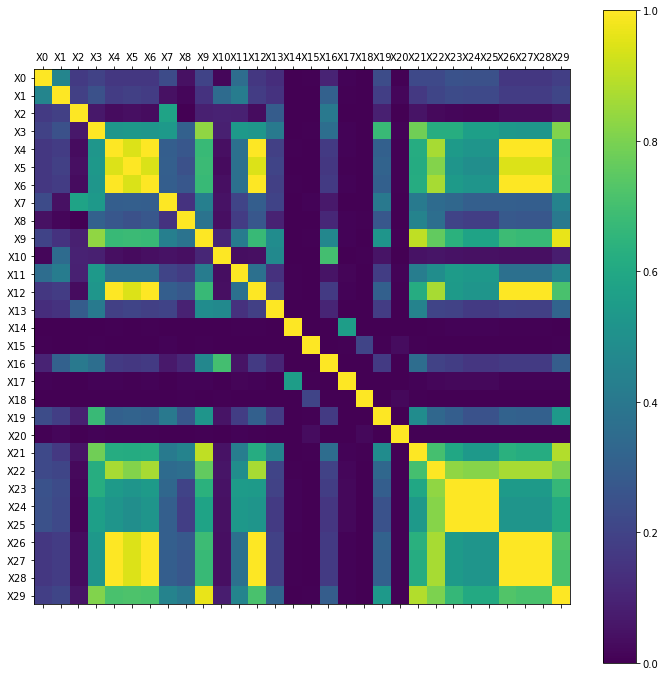

In [32]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) 
hot_img = ax.matshow(np.abs(correlation_matrix), vmin=0, vmax=1) 
fig.colorbar(hot_img) 
ticks = np.arange(0, 30, 1) 
ax.set_xticks(ticks)
ax.set_yticks(ticks) 
names = ['X' + str(i) for i in range(tX.shape[1])] 
ax.set_xticklabels(names) 
ax.set_yticklabels(names) 

Text(0.5, 1.0, 'tX28')

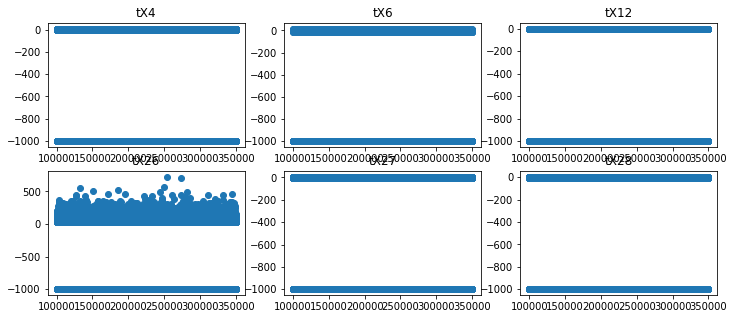

In [70]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(231)
ax1.scatter(ids, tX[:,4])
ax1.set_title('tX4')

ax2 = plt.subplot(232)
ax2.scatter(ids, tX[:,6])
ax2.set_title('tX6')

ax3 = plt.subplot(233)
ax3.scatter(ids, tX[:,12])
ax3.set_title('tX12')

ax4 = plt.subplot(234)
ax4.scatter(ids, tX[:,26])
ax4.set_title('tX26')

ax5 = plt.subplot(235)
ax5.scatter(ids, tX[:,27])
ax5.set_title('tX27')

ax6 = plt.subplot(236)
ax6.scatter(ids, tX[:,28])
ax6.set_title('tX28')

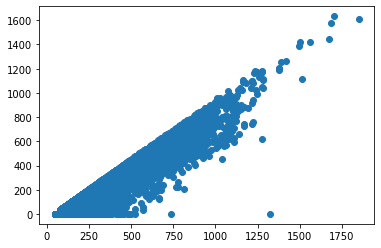

In [74]:
plt.scatter(tX[:,9], tX[:,29])

Text(0.5, 1.0, 'tX25')

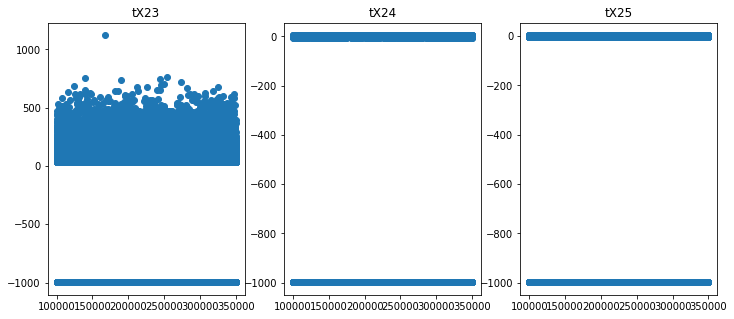

In [75]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(131)
ax1.scatter(ids, tX[:,23])
ax1.set_title('tX23')

ax2 = plt.subplot(132)
ax2.scatter(ids, tX[:,24])
ax2.set_title('tX24')

ax3 = plt.subplot(133)
ax3.scatter(ids, tX[:,25])
ax3.set_title('tX25')

### 2. unique of each feature
#### Each column seems not having single value. However, the 23rd feature only has 4 values, hence it needs to be investigated more.

In [37]:
for i in range(tX.shape[1]):
    print(i, len(np.unique(tX[:, i])))

0 108338
1 101637
2 100558
3 115563
4 7087
5 68366
6 16593
7 4692
8 59042
9 156098
10 5931
11 2829
12 1002
13 59639
14 4971
15 6285
16 61929
17 4987
18 6285
19 87836
20 6285
21 179740
22 4
23 86590
24 8558
25 6285
26 42464
27 8628
28 6286
29 103559


#### This column seems like category or ordinal values

In [39]:
np.unique(tX[:, 22])

array([0., 1., 2., 3.])

### 3. The distribution for each column

### 4. To see the variance for each feature

In [40]:
np.var(tX, axis=0) 

array([1.65116124e+05, 1.24925594e+03, 1.66697530e+03, 4.05202959e+03,
       2.06551758e+05, 4.32925819e+05, 2.05226188e+05, 6.12947368e-01,
       4.96106539e+02, 1.33878515e+04, 7.13587788e-01, 1.42463906e+00,
       2.05749162e+05, 5.02299351e+02, 1.47398106e+00, 3.30061476e+00,
       4.86858853e+02, 1.60017344e+00, 3.30006328e+00, 1.08205651e+03,
       3.28413798e+00, 1.60020609e+04, 9.55358361e-01, 2.84048199e+05,
       2.39451000e+05, 2.39446692e+05, 2.30279570e+05, 2.05556795e+05,
       2.05560779e+05, 9.60703157e+03])

## Generate predictions and save ouput in csv format for submission:

In [33]:
DATA_TEST_PATH = '../data/train.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = 'prediction_haluhalu' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)